# Sentiment Analysis


In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
cols = ['sentiment','id','date','query_string','user','text']

train = pd.read_csv('data/training.1600000.processed.noemoticon.csv', 
                    header=None, names=cols, encoding = "ISO-8859-1")

test = pd.read_csv('data/testdata.manual.2009.06.14.csv', header=None, names=cols)

In [3]:
train

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [9]:
train.sentiment.unique()

array([0, 4])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer()
cvec.fit(train.text)

neg_doc_matrix = cvec.transform(train[train.sentiment == 0].text)
pos_doc_matrix = cvec.transform(train[train.sentiment == 4].text)

neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)

neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313176,252704,565880
the,257869,266003,523872
my,190846,125983,316829
it,157225,147544,304769
and,153968,149635,303603
you,103842,198194,302036
is,128452,109876,238328
in,115445,101115,216560
for,98986,117362,216348
of,92717,91087,183804


Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

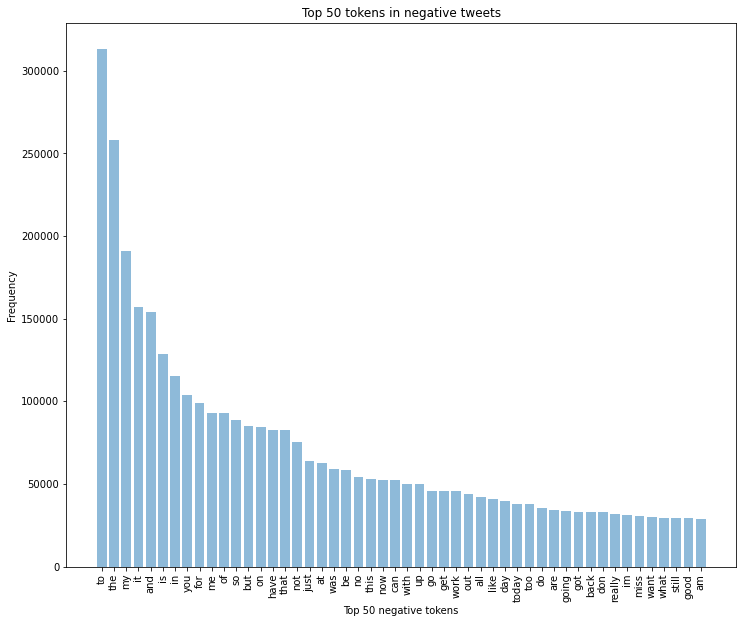

In [13]:
y_pos = np.arange(50)

plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='negative',ascending=False)       
                                  ['negative'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='negative',ascending=False) 
                                     ['negative']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

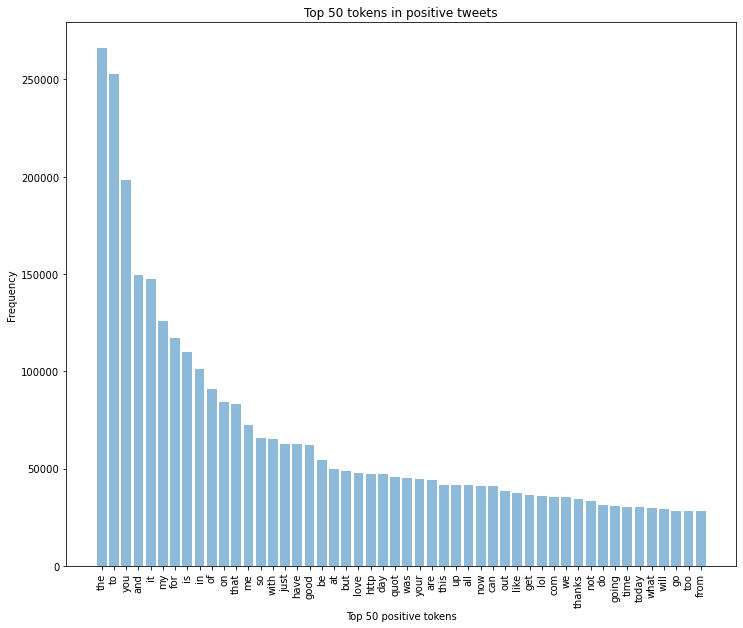

In [15]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, 
        term_freq_df.sort_values(by='positive',ascending=False)       
                                  ['positive'][:50], 
                                  align='center', 
                                  alpha=0.5)
plt.xticks(y_pos, 
           term_freq_df.sort_values(by='positive',ascending=False) 
                                     ['positive']   
                                     [:50].index,
                                     rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

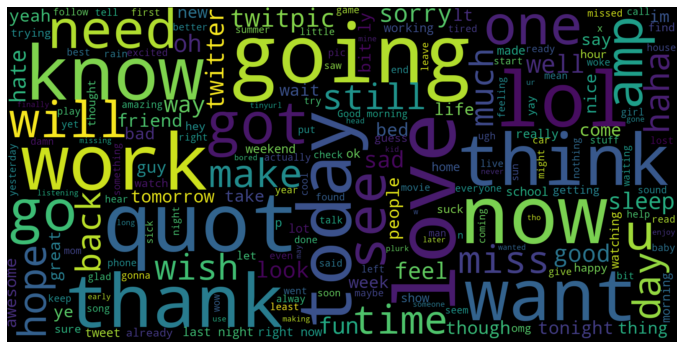

In [19]:
from wordcloud import WordCloud

text = []
for t in train.text:
    text.append(t)
text = pd.Series(text).str.cat(sep=' ')
wordcloud = WordCloud(width=1600,
                      height=800,
                      max_font_size=200
                     ).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()